In [ ]:
import os, sys  
#from google.colab import drive  
#drive.mount('/content/drive')

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/CodeData/result_02.csv')
df=df.T
df.to_csv('result_2.csv')

In [ ]:
dev_name = 'HCI'
pg_path = '/content/drive/MyDrive/CodeData/[Packages]/'+dev_name

sys.path.append(pg_path)

In [ ]:
sys.path.append('/content/drive/MyDrive')

In [ ]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 32.5 MB/s eta 0:00:00


In [ ]:
import os
import sys
import pandas as pd
import numpy as np
from scipy import signal
import mne
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
n_channels = 16
sampling_freq = 128  # in Hertz
ch_names = ['Fp1', 'Fp2', 'F7','F3','Fz','F4','F8','C3','Cz','C4','P3','P4','T3','T4','T5','T6']
ch_types = ['eeg'] * n_channels
all_ch_names = ch_names + ['Task','STM']
all_ch_types = ch_types + ['misc','misc']
p_detrend = 1 # 0: OFF, 1: On
p_normalization = 1 # 0: do not, 1: [0, 1] scaling, 2: standardization (x-mean)/var
p_ica_flag = 1
p_ts_psd_flag = 0

               0             1             2             3             4   \
Unnamed: 0    0.0      1.000000      2.000000      3.000000      4.000000   
0             0.0   5216.852452   4916.757931   4589.640151   4792.482232   
1             2.0  10455.743725   9850.123209   9445.824855  10553.622014   
2             4.0  10458.381231   9858.594520   9279.371414   9772.383842   
3             6.0  10449.999326   9844.199996   9415.650000  10497.653246   
...           ...           ...           ...           ...           ...   
33252       202.0  10798.641836  10147.937852  10170.311948  11013.129176   
33253       204.0  10801.458156  10156.543274  10147.133189  10443.740838   
33254       206.0  10794.126784  10143.311041  10166.847428  10977.701661   
33255       208.0  10809.482433  10164.209922  10154.576320  10492.266475   
33256       210.0  10790.684615  10140.248852  10162.064154  10925.242117   

                      5             6             7            8   \
Unname

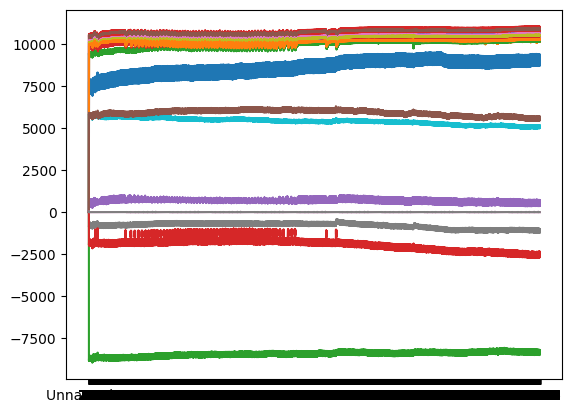

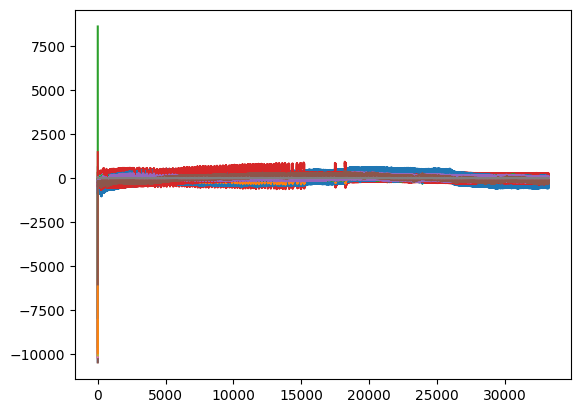

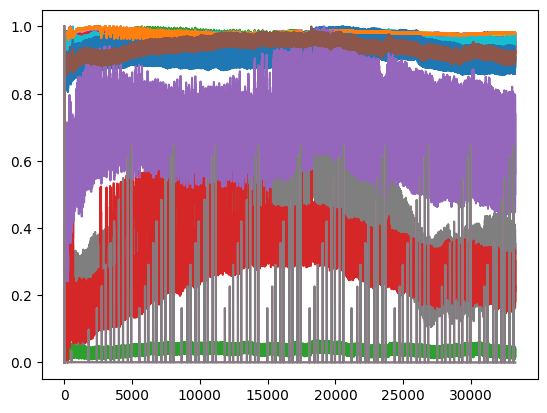

In [ ]:
## CSV File

filenames=[(f'/content/drive/MyDrive/CodeData/result_02.csv')]


eeg_raw={}
#eeg_raw=pd.DataFrame()

for i in range(0,len(filenames)):
    temp_pd = pd.read_csv(filenames[i])
    temp_pd=temp_pd.T
    #temp_pd=temp_pd[[1,2,3]]
    print(temp_pd)
    temp_pd=temp_pd.drop(columns=[17,18,19,20,21,22,23,24,25,26,27,28,29,30,0])
    temp_pd['Task'] = temp_pd[31]
    #temp_pd=temp_pd.drop(range(0,sampling_freq*5)) # remove first 5sec data
    
    if(i==0):
      plt.figure()
      plt.plot(temp_pd)
        
    ## Detrend
    if p_detrend == 1:
        temp_pd = pd.DataFrame(signal.detrend(temp_pd, axis=0))

    if(i==0):
      plt.figure()
      plt.plot(temp_pd)

    ## Normalization
    if p_normalization == 1:
        temp_pd = (temp_pd - temp_pd.min()) / (temp_pd.max() - temp_pd.min())
    elif p_normalization == 2:
        temp_pd = (temp_pd - temp_pd.mean()) / temp_pd.std()

    if(i==0):
      plt.figure()
      plt.plot(temp_pd)
    
    ## Task marking by filenames
   # temp_pd['Task']=int(i)+1   
    #temp_pd['STM']=0

    #for STM_i in range(0,temp_pd.shape[0],sampling_freq):
        #temp_pd['STM'].iat[STM_i] = temp_pd['Task'].iat[STM_i]   
    
    ## channels X times
    temp_pd = temp_pd.transpose()

    ## collecting EEG raw
    eeg_raw[i]=temp_pd

In [ ]:
info = mne.create_info(n_channels, sfreq=sampling_freq)
info = mne.create_info(all_ch_names, ch_types=all_ch_types, sfreq=sampling_freq)
info.set_montage('standard_1020')
info['description'] = 'OpenBCI'
info['bads'] = []  # Names of bad channels
    #info['highpass'] = l_freqs
    #info['lowpass'] = h_freqs
print(info)
raw = mne.io.RawArray(eeg_raw[i], info)
raw

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, C3, Cz, C4, P3, P4, T3, T4, T5, ...
 chs: 16 EEG, 2 misc
 custom_ref_applied: False
 description: OpenBCI
 dig: 19 items (3 Cardinal, 16 EEG)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 18
 projs: []
 sfreq: 128.0 Hz
>
Creating RawArray with float64 data, n_channels=18, n_times=33258
    Range : 0 ... 33257 =      0.000 ...   259.820 secs
Ready.


<RawArray | 18 x 33258 (259.8 s), ~4.6 MB, data loaded>

In [ ]:
mne_raw={}
for i in range(0,len(filenames)):
    
    ## MNE object
    info = mne.create_info(n_channels, sfreq=sampling_freq)
    info = mne.create_info(all_ch_names, ch_types=all_ch_types, sfreq=sampling_freq)
    info.set_montage('standard_1020')

    info['description'] = 'OpenBCI'
    info['bads'] = []  # Names of bad channels
    #info['highpass'] = l_freqs
    #info['lowpass'] = h_freqs
    print(info)

    raw = mne.io.RawArray(eeg_raw[i], info)
    mne_raw[i] = raw


#data, times = mne_raw[1].get_data(picks=['Fp1'], return_times=True)
#plt.plot(times,data[0,:])
# mne_raw[1].plot(duration=10000,show_scrollbars=False, show_scalebars=False,scalings='auto')

mne_raw[0].plot_psd(fmax=50)
print('Done')

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, C3, Cz, C4, P3, P4, T3, T4, T5, ...
 chs: 16 EEG, 2 misc
 custom_ref_applied: False
 description: OpenBCI
 dig: 19 items (3 Cardinal, 16 EEG)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 18
 projs: []
 sfreq: 128.0 Hz
>
Creating RawArray with float64 data, n_channels=18, n_times=33258
    Range : 0 ... 33257 =      0.000 ...   259.820 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
Done


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 1 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 4.00 Hz (-6 dB cutoff frequency: 62.00 Hz)
- Filter length: 423 samples (3.305 sec)

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


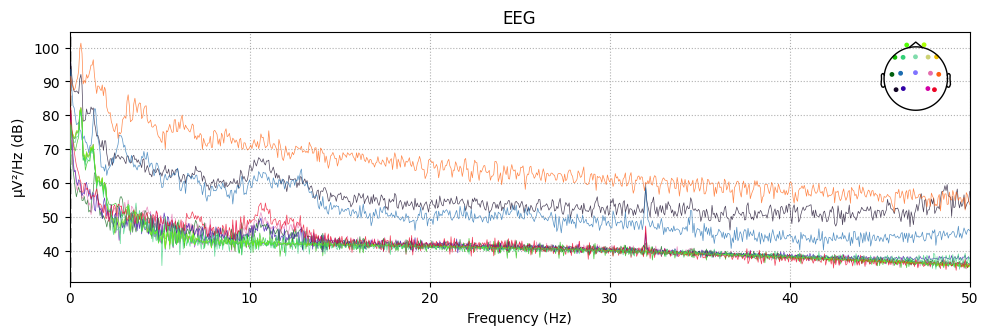

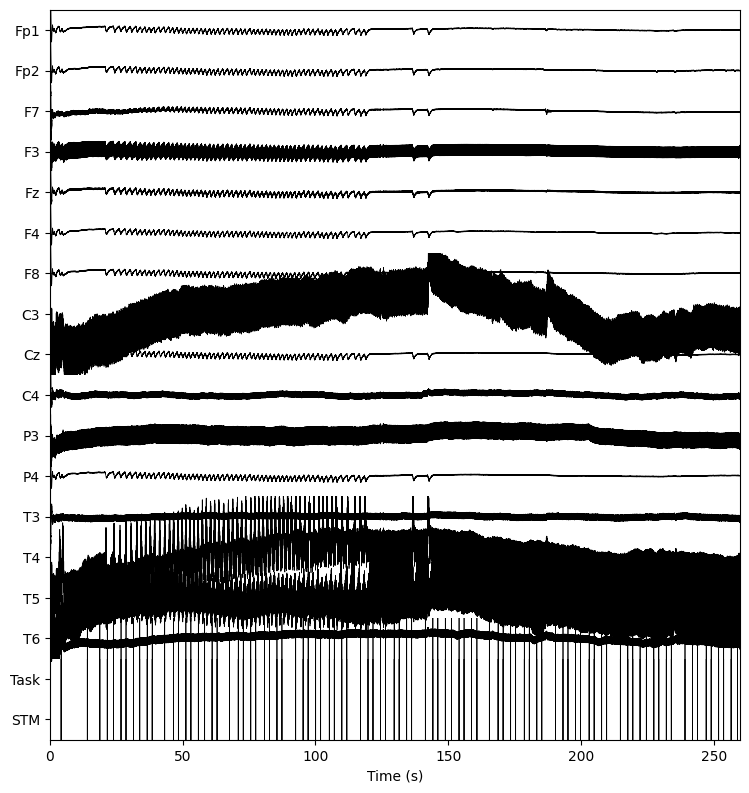

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)



In [ ]:
## Filtering
mne_raw_filtered={}
for i in range(0,len(filenames)):
    data = mne_raw[i].copy()
    #data_lp_hp = data.filter(l_freq=raw.info['lowpass'],h_freq=raw.info['highpass'],picks='eeg', method='fir')
    data_lp_hp = data.filter(l_freq=60,h_freq=1,picks='eeg', method='fir')
    data_lp_hp_nt = data_lp_hp.copy().notch_filter(freqs=60, picks='eeg')
    mne_raw_filtered[i] = data_lp_hp_nt.copy()

mne_raw_filtered[0].plot(duration=10000,show_scrollbars=False, show_scalebars=False,scalings='auto')
mne_raw_filtered[0].plot_psd(fmax=50)
print('')

Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 16 components


<ipython-input-13-72bd2309f6d6>:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(mne_raw_filtered[i])


Fitting ICA took 10.2s.


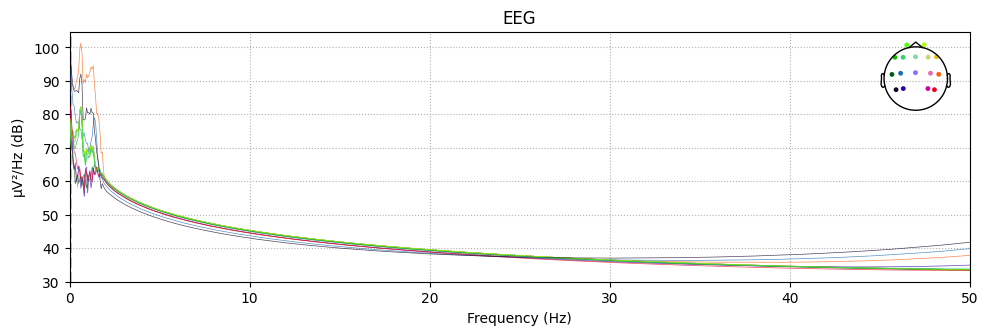

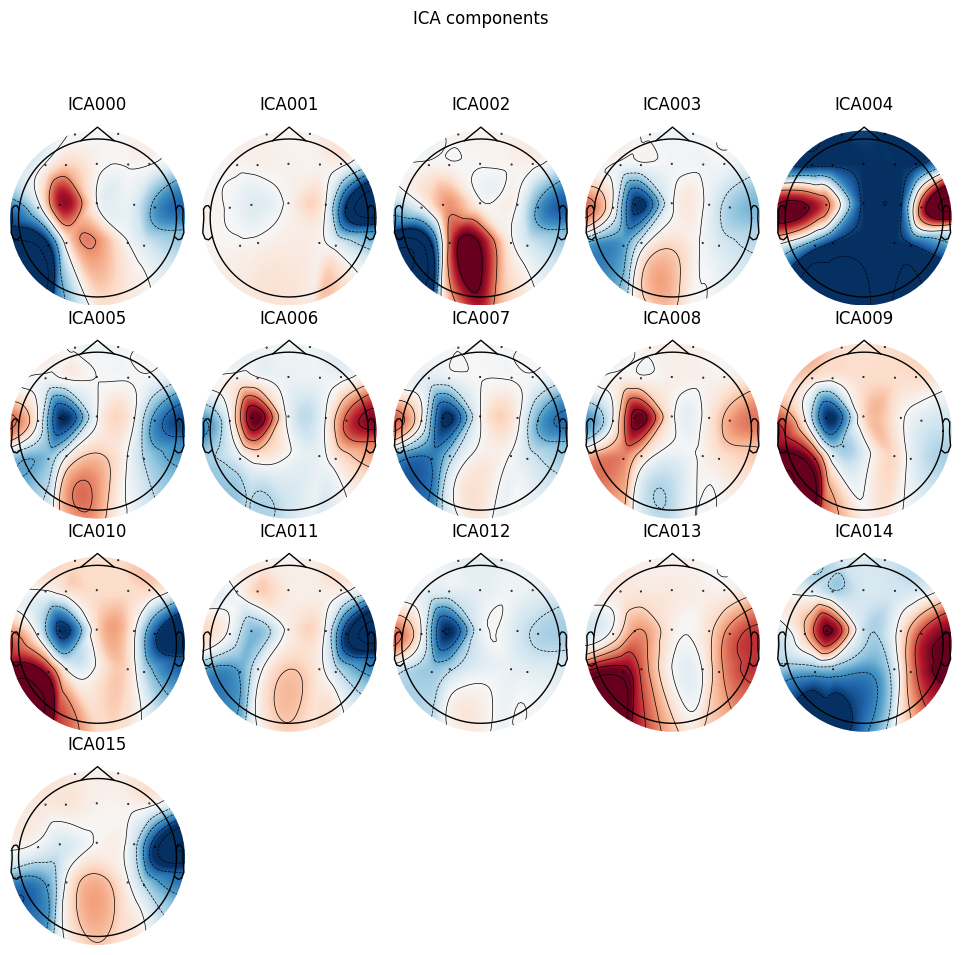

Creating RawArray with float64 data, n_channels=16, n_times=33258
    Range : 0 ... 33257 =      0.000 ...   259.820 secs
Ready.


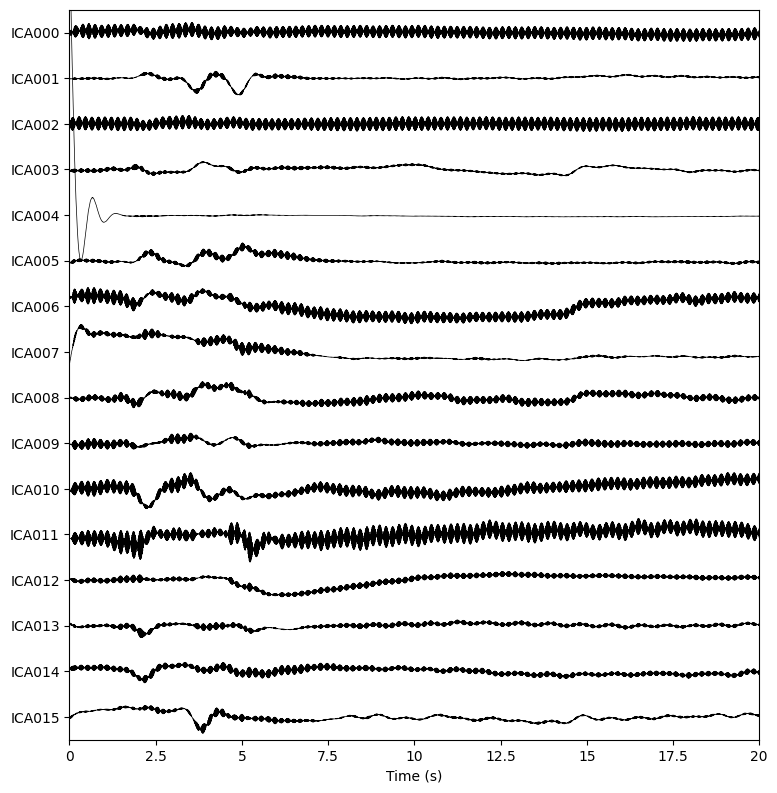

In [ ]:
##### ICA
if p_ica_flag == 1:
    for i in range(0,len(filenames)):
        ica = mne.preprocessing.ICA(n_components=n_channels, random_state=97, max_iter='auto')
        ica.fit(mne_raw_filtered[i])
        #ica.plot_components(picks= 'egg', ch_type='eeg', outlines='skirt')
        ica.plot_components( ch_type='eeg', outlines='head')
        ica.plot_sources(mne_raw_filtered[i], show_scrollbars=False)
        print()

Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 16 components


<ipython-input-14-a102878f5c3a>:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(mne_raw_filtered[i])


Fitting ICA took 14.2s.
Creating RawArray with float64 data, n_channels=16, n_times=33258
    Range : 0 ... 33257 =      0.000 ...   259.820 secs
Ready.


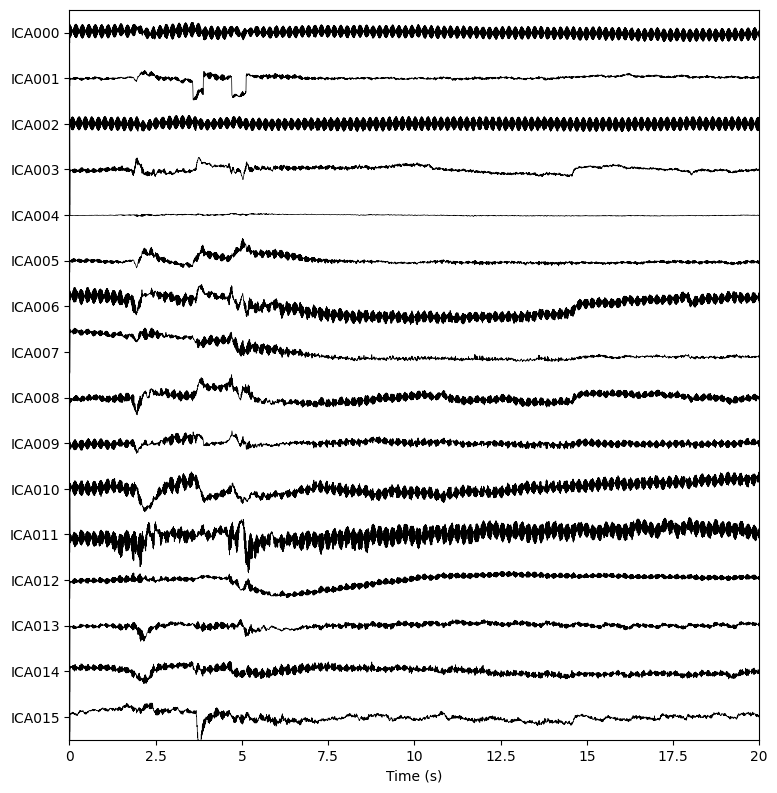

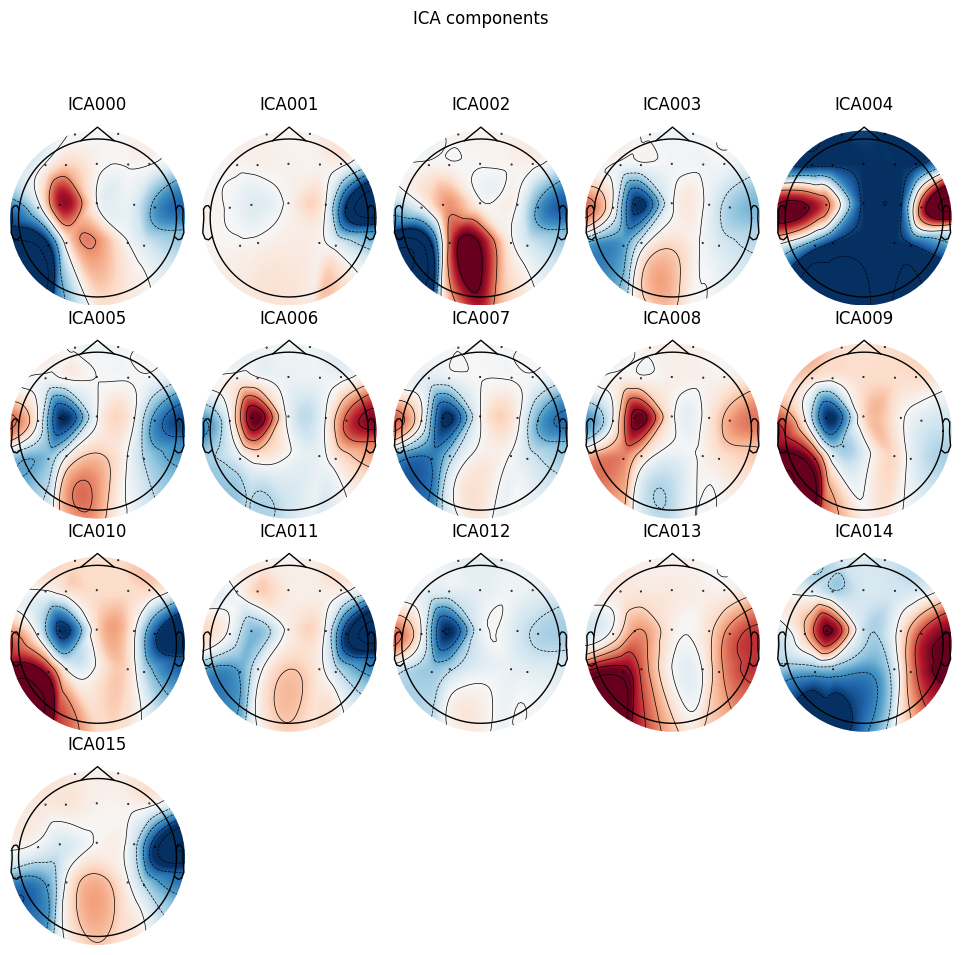

[<MNEFigure size 975x967 with 16 Axes>]

In [ ]:
i=0
ica = mne.preprocessing.ICA(n_components=n_channels, random_state=97, max_iter='auto')
ica.fit(mne_raw_filtered[i])
ica.plot_sources(raw, show_scrollbars=False)
ica.plot_components()

Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 16 components


<ipython-input-15-d019d2f29c06>:16: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(mne_raw_filtered[i])


Fitting ICA took 9.6s.
Applying ICA to Raw instance
    Transforming to ICA space (16 components)
    Zeroing out 10 ICA components
    Projecting back using 16 PCA components


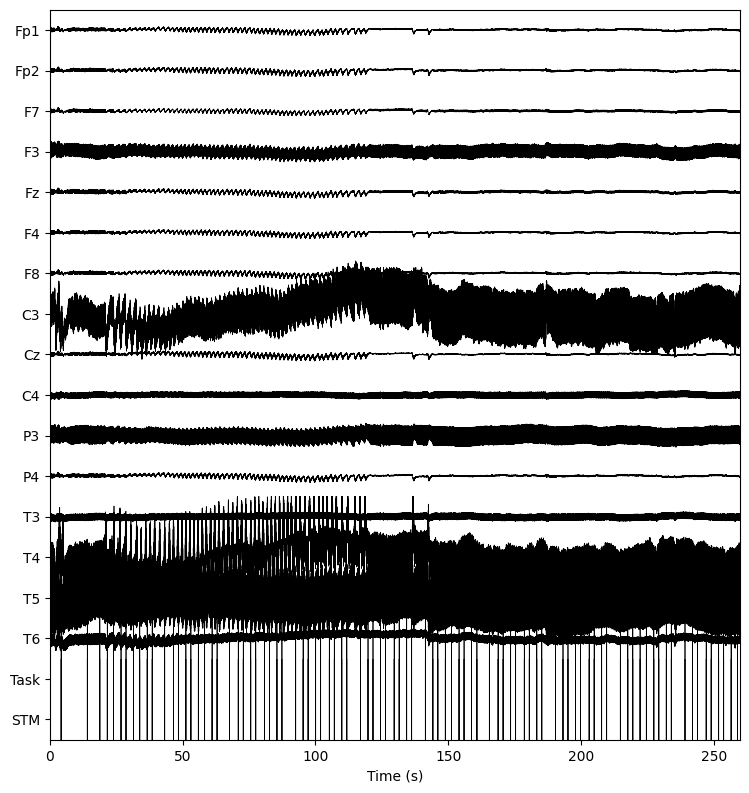

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)



In [ ]:
if p_ica_flag == 1:
    mne_raw_filtered_ica={}

    # #[To-Do] : Automation
    ica_exclude = {}
    ica_exclude[0] = [3,4,6,7,8,10,11,12,13,15]
    ica_exclude[1] = [0,2,3,4,7,8,9,10,11,12,13,14,15]
    ica_exclude[2] = [2,3,4,5,6,10]
    ica_exclude[3] = [0,1,4,5,6,7,8,9,11,13,14,15]
    ica_exclude[4] = [4,5,6,8,10,11,12,13,14]
    ica_exclude[5] = [1,2,3,4,5,6,9,10,12,15]
    ica_exclude[6] = [0,1,3,4,5,6,10,11,13,14,15]

    for i in range(0,len(filenames)):
        ica = mne.preprocessing.ICA(n_components=n_channels, random_state=97, max_iter='auto')
        ica.fit(mne_raw_filtered[i])    
        ica.exclude = ica_exclude[i]
        #ica.plot_properties(mne_raw_filtered[i], picks=ica.exclude)
        mne_raw_filtered_ica[i] = mne_raw_filtered[i].copy()
        ica.apply(mne_raw_filtered_ica[i])

    mne_raw_filtered_ica[0].plot(duration=10000,show_scrollbars=False, show_scalebars=False, scalings='auto')
    mne_raw_filtered_ica[0].plot_psd(fmax=50)
    print('')

In [ ]:
raw.info['sfreq']

128.0

In [ ]:
## PSD

#data_temp = mne_raw.copy()
data_temp = mne_raw_filtered.copy()
#data_temp = mne_raw_filtered_ica.copy()

psds_data = {}

insterest_band = ['Delta δ','Theta θ','Alpha α','Beta β','Gamma γ',
                      'δ/Others','θ/Others','α/Others','β/Others','γ/Others',
                      'θ/α','α/θ','β/α','β/θ','β/(α+θ)','(δ+θ)/α','α/δ','θ/β','(θ+δ)/(α+β)','α/β','δ/θ','(θ+α)/β']

for f_i in range(0,len(filenames)):
    psds, freqs = mne.time_frequency.psd_array_welch(data_temp[f_i].to_data_frame().to_numpy(),sfreq=128,fmin=2, fmax=59,n_per_seg=256) # PSD
    psds = 10. * np.log10(psds)
    
    #psds = (psds - psds.min()) / (psds.max() - psds.min())
    psds = (psds - psds.mean()) / psds.std()
        
    psds_temp=np.zeros(len(insterest_band))
    psds_temp_collect=pd.DataFrame()
    
    for i in range(0, n_channels):
        psds_temp[0] = sum(psds[i][((freqs >=0) & (freqs <= 4))]) / sum(((freqs >=0) & (freqs <= 4))) # delta
        psds_temp[1] = sum(psds[i][((freqs >=4) & (freqs <= 8))]) / sum(((freqs >=4) & (freqs <= 8))) # theta
        psds_temp[2] = sum(psds[i][((freqs >=8) & (freqs <= 12))]) / sum((freqs >=8) & (freqs <= 12)) # alpha
        psds_temp[3] = sum(psds[i][((freqs >=12) & (freqs <= 30))]) / sum((freqs >=12) & (freqs <= 30)) # beta
        psds_temp[4] = sum(psds[i][((freqs >=30) & (freqs <= 45))]) / sum((freqs >=30) & (freqs <= 45)) # gamma
        psds_temp[5]  = psds_temp[0] / (psds_temp[1]+psds_temp[2]+psds_temp[3]+psds_temp[4])
        psds_temp[6]  = psds_temp[1] / (psds_temp[0]+psds_temp[2]+psds_temp[3]+psds_temp[4])
        psds_temp[7]  = psds_temp[2] / (psds_temp[0]+psds_temp[1]+psds_temp[3]+psds_temp[4])
        psds_temp[8]  = psds_temp[3] / (psds_temp[0]+psds_temp[1]+psds_temp[2]+psds_temp[4])
        psds_temp[9]  = psds_temp[4] / (psds_temp[0]+psds_temp[1]+psds_temp[2]+psds_temp[3])
        psds_temp[10] = psds_temp[1] / psds_temp[2]
        psds_temp[11] = psds_temp[2] / psds_temp[1]
        psds_temp[12] = psds_temp[3] / psds_temp[2]
        psds_temp[13] = psds_temp[3] / psds_temp[1]
        psds_temp[14] = psds_temp[3] / (psds_temp[2]+psds_temp[1])
        psds_temp[15] = (psds_temp[0]+psds_temp[1]) / psds_temp[2]
        psds_temp[16] = psds_temp[2] / psds_temp[0]
        psds_temp[17] = psds_temp[1] / psds_temp[3]
        psds_temp[18] = (psds_temp[1]+psds_temp[0]) / (psds_temp[2]+psds_temp[3])
        psds_temp[19] = psds_temp[2] / psds_temp[3]
        psds_temp[20] = psds_temp[0] / psds_temp[1]
        psds_temp[21]  = (psds_temp[1]+psds_temp[2]) / psds_temp[3]
        psds_temp_collect = pd.concat([psds_temp_collect,pd.DataFrame(psds_temp)],axis=1)

    psds_temp_collect = psds_temp_collect.transpose()
    psds_temp_collect.columns=insterest_band
    psds_temp_collect.index=ch_names
    
    psds_data[f_i] = psds_temp_collect

for b_i in range(len(insterest_band)):
    # Create a grid of subplots with one column for each file
    fig, ax = plt.subplots(nrows=1, ncols=len(filenames), figsize=(30, 30), sharex=True, sharey=True)
    
    # Loop through each file
    for f_i in range(len(filenames)):
        # Plot the topomap for the current band and file
        im, _ = mne.viz.plot_topomap(psds_data[f_i][insterest_band[b_i]], mne_raw[f_i].info, axes=ax[f_i], extrapolate='head', names=ch_names, cmap='RdBu_r', show=False)
        
        # Set the title for the current subplot
        ax[f_i].set_title(f"{insterest_band[b_i]}: S{f_i}", fontweight='bold')
    
    # Add a colorbar to the figure
    clb = fig.colorbar(im, ax=ax.ravel().tolist(), shrink=0.1)
    
    # Uncomment the following lines if you want to save the figure to a file
    # filename = f"{exp_name}_PSD_{b_i}"
    # plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    
    # Uncomment the following line if you want to close the figure after saving it
    # plt.close()
    
# Show the figure
plt.show()

Effective window size : 2.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


TypeError: ignored

In [ ]:
for b_i in range(len(interest_band)):
    # Create a grid of subplots with one column for each file
    fig, ax = plt.subplots(nrows=1, ncols=len(filenames), figsize=(30, 30), sharex=True, sharey=True)
    
    # Loop through each file
    for f_i in range(len(filenames)):
        # Plot the topomap for the current band and file
        im, _ = mne.viz.plot_topomap(psds_data[f_i][interest_band[b_i]], mne_raw[f_i].info, axes=ax[f_i], extrapolate='head', names=ch_names, cmap='RdBu_r', show=False)
        
        # Set the title for the current subplot
        ax[f_i].set_title(f"{interest_band[b_i]}: S{f_i}", fontweight='bold')
    
    # Add a colorbar to the figure
    clb = fig.colorbar(im, ax=ax.ravel().tolist(), shrink=0.1)
    
    # Uncomment the following lines if you want to save the figure to a file
    # filename = f"{exp_name}_PSD_{b_i}"
    # plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    
    # Uncomment the following line if you want to close the figure after saving it
    # plt.close()
    
# Show the figure
plt.show()